# Benckmark Model

In [1]:
!pip install cpadapter

In [20]:
import pandas as pd
from cpadapter import Adapt_to_CP
from cpadapter.performance_measures import picp, pinaw, relative_mean_width
from cpadapter.utils import train_cal_test_split
from cpadapter.visualization import band_interval_plot, line_interval_plot, conditional_band_interval_plot
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

## Load cleaned data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path = "/content/drive/My Drive/Taller_diseño_proyecto/data armadillo/clean_data.csv"
df = pd.read_csv(path)
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,PORCENTAJE DE LOGRO,TIPO DE ESTABLECIMIENTO,NEM,PSU LENGUAJE,VIA DE INGRESO
0,0.312500,5,678.0,612.0,6
1,0.312500,3,635.0,684.0,6
2,0.333333,5,557.0,729.0,2
3,0.375000,4,643.0,660.0,6
4,0.437500,4,702.0,626.0,2
...,...,...,...,...,...
2215,0.895833,3,736.0,725.0,6
2216,0.895833,5,804.0,787.0,6
2217,0.895833,3,742.0,766.0,6
2218,0.937500,3,804.0,766.0,6


## Split data

In [9]:
# train, calibration and test datasets

x_train, y_train, x_cal, y_cal, x_test, y_test = train_cal_test_split(df, 'PORCENTAJE DE LOGRO', 0.7, 0.2, True)

print(x_train.shape)
print(x_cal.shape)
print(x_test.shape)

(1554, 4)
(444, 4)
(222, 4)


## Model

In [10]:
model = DecisionTreeRegressor()
adapted_model = Adapt_to_CP(model, True)

In [11]:
adapted_model.fit(x_train, y_train)

In [12]:
preds = adapted_model.calibrate_and_predict(x_cal, y_cal, x_test, 0.8)

In [13]:
lb = preds[0]
prediction = preds[1]
ub = preds[2]

## Visualizations

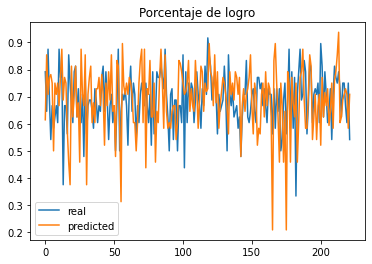

In [16]:
x = range(y_test.shape[0])
# print(x)
# print(len(Y_test[:, 0]))
plt.plot(x, y_test.reshape(-1), label = "real")
plt.plot(x, prediction, label = "predicted")
plt.title("Porcentaje de logro")
plt.legend()
plt.show()

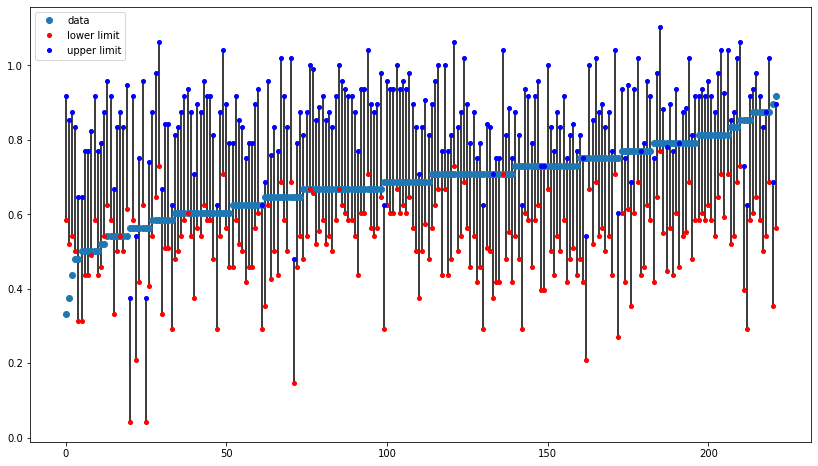

In [17]:
line_interval_plot(y_test, lb, ub, True)

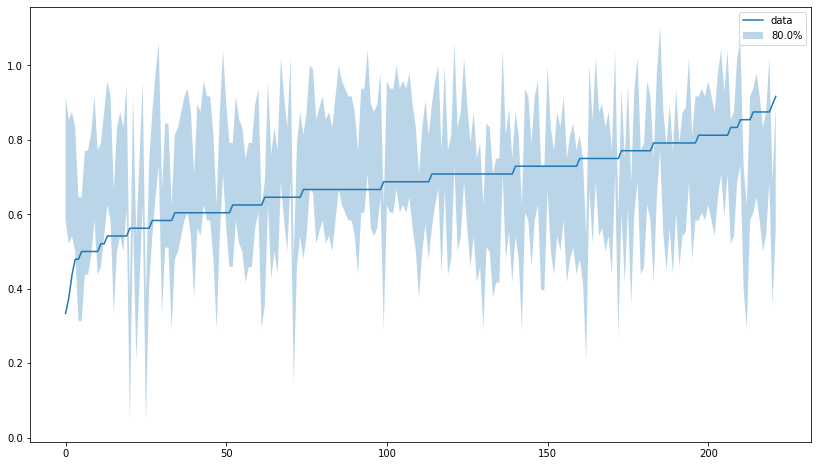

In [18]:
band_interval_plot(y_test, lb, ub, 0.8, True)

## Performance metrics

In [21]:
print('RMSE:', sqrt(mean_squared_error(y_test, prediction)))

print('Coverage:', picp(y_test, lb, ub))
print('Mean Interval Width:', relative_mean_width(y_test, lb, ub))

RMSE: 0.13885571894952886
Coverage: 0.8288288288288288
Mean Interval Width: 0.4853785187209624
